# 0. Introduction.

Hi! This lab work is about the different ways of collecting data from websites. Let's start with a brief introduction on how to complete it.

In the code and text of this lab, you will encounter blocks of two types. The first one will be in code cells and looks like this:


```
# TODO
```

This means that you need to write one or more lines of code here.  

The second type of block looks like this - <font color='violet'> \# TODO </font>. It means that you need to write your own thoughts and conclusions here. When you write, please do not change the color of your text – this will make it easier to check.  

All the necessary libraries are collected in the text below – run them and start the lab work! :)

In [2]:
from urllib.request import urlopen
from urllib.parse import urlparse, urldefrag, urljoin
from bs4 import BeautifulSoup
import requests
import pandas as pd
import re
import json

# Part 1. Working with Static Pages Using bs4. 3 points.



In this part, you do not need to work with marketplaces or large, complex online stores. It's enough to play around with a **small niche shop**.  

Example of a site suitable for the task:  
- Vegetable Seeds - Aelita https://ailita-shop.ru/  

You need to find a **SIMILAR** website without dynamic content loading (there are plenty of such sites on the internet).

To form an understanding of the store, it's enough to look at the products in one selected category.  

The product page **should contain the following information that you need to collect for this task**:

- Name
- Image
- Characteristics (at least 1)
- Description  

The description should be sufficiently detailed (more than one sentence) and include information about the product's characteristics. For example, as you often see on AliExpress.

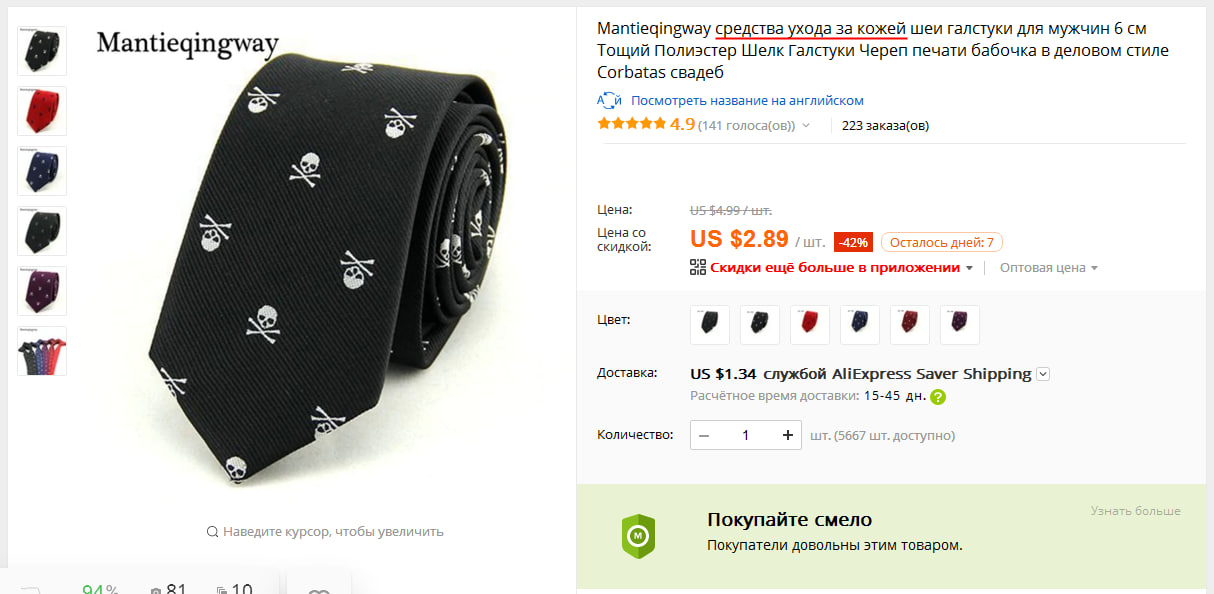

## Research

Choose a store that meets the description of a competitor store:

<font color='violet'> \# TODO </font>

Choose a product category and look at the product listings. **The category should contain 20+ products so that you can form a more complete opinion about the products in the store.**

In [3]:
url = "https://ailita-shop.ru/catalog/semena/semena_ovoshchey/arbuz/"

Open the link using the `urllib` library and load the data into a variable called `html`. Don't forget about encoding!

In [4]:
html = urlopen(url).read().decode('utf-8')

Parse the textual information on the page using the `bs4` library.

In [5]:
soup = BeautifulSoup(html, 'html.parser')

Find all the `href` nodes on the page.  

In [6]:
hrefs = [a['href'] for a in soup.find_all('a', href=True)]
print("All href nodes:", hrefs)

All href nodes: ['/about/', '/delivery/', '/skidki-i-podarki/', '/delivery-points/', '/articles/', '/reviews/', '/contacts/', 'javascript:;', 'javascript:;', 'https://wa.me/89645054874', 'https://www.youtube.com/channel/UCQheT4QWhOG56NLrJV4kzyg?sub_confirmation=1', 'https://vk.com/agrofirmaailita', 'https://ok.ru/group/55102782177521', 'https://zen.yandex.ru/id/5d8fefafa660d700ae013f77', '/', '#', '#', 'https://wa.me/+79645054874', 'tel:84957251084', 'tel:88006007928', '/cart/', '/favorite/', 'javascript:;', 'javascript:;', '/', '/', '/catalog/', '/catalog/semena/', '/catalog/agrokhimiya_i_grunty/', '/catalog/inventar/', '/catalog/semena/semena_ovoshchey/', '/catalog/semena/semena_zeleni_i_pryanostey/', '/catalog/semena/semena_yagod/', '/catalog/semena/semena_tsvetov/', '/catalog/semena/semena_gazonnykh_trav_i_sideratov/', '/catalog/agrokhimiya_i_grunty/grunty_i_drenazh/', '/catalog/agrokhimiya_i_grunty/adyuvanty/', '/catalog/agrokhimiya_i_grunty/zashchita_ot_sornyakov/', '/catalog/agr

Save the full addresses of the links in a list.  

Tip: Use `urljoin`.  

In [7]:
base_url = "https://ailita-shop.ru/catalog/semena/semena_ovoshchey/arbuz/"
links = [urljoin(url, href) for href in hrefs]
print("Full links:", links)

Full links: ['https://ailita-shop.ru/about/', 'https://ailita-shop.ru/delivery/', 'https://ailita-shop.ru/skidki-i-podarki/', 'https://ailita-shop.ru/delivery-points/', 'https://ailita-shop.ru/articles/', 'https://ailita-shop.ru/reviews/', 'https://ailita-shop.ru/contacts/', 'javascript:;', 'javascript:;', 'https://wa.me/89645054874', 'https://www.youtube.com/channel/UCQheT4QWhOG56NLrJV4kzyg?sub_confirmation=1', 'https://vk.com/agrofirmaailita', 'https://ok.ru/group/55102782177521', 'https://zen.yandex.ru/id/5d8fefafa660d700ae013f77', 'https://ailita-shop.ru/', 'https://ailita-shop.ru/catalog/semena/semena_ovoshchey/arbuz/', 'https://ailita-shop.ru/catalog/semena/semena_ovoshchey/arbuz/', 'https://wa.me/+79645054874', 'tel:84957251084', 'tel:88006007928', 'https://ailita-shop.ru/cart/', 'https://ailita-shop.ru/favorite/', 'javascript:;', 'javascript:;', 'https://ailita-shop.ru/', 'https://ailita-shop.ru/', 'https://ailita-shop.ru/catalog/', 'https://ailita-shop.ru/catalog/semena/', 'ht

Which links correspond to product listings? Choose all such links. To do this, write a filtering function that will determine whether a link is valid.

In [8]:
def is_product_link(link):
    return '/catalog/semena/' in link

In [9]:
filtered_links = list(filter(is_product_link, links))
print(filtered_links)

['https://ailita-shop.ru/catalog/semena/semena_ovoshchey/arbuz/', 'https://ailita-shop.ru/catalog/semena/semena_ovoshchey/arbuz/', 'https://ailita-shop.ru/catalog/semena/', 'https://ailita-shop.ru/catalog/semena/semena_ovoshchey/', 'https://ailita-shop.ru/catalog/semena/semena_zeleni_i_pryanostey/', 'https://ailita-shop.ru/catalog/semena/semena_yagod/', 'https://ailita-shop.ru/catalog/semena/semena_tsvetov/', 'https://ailita-shop.ru/catalog/semena/semena_gazonnykh_trav_i_sideratov/', 'https://ailita-shop.ru/catalog/semena/semena_ovoshchey/arbuz/', 'https://ailita-shop.ru/catalog/semena/semena_ovoshchey/baklazhan/', 'https://ailita-shop.ru/catalog/semena/semena_ovoshchey/bobovye/', 'https://ailita-shop.ru/catalog/semena/semena_ovoshchey/dynya/', 'https://ailita-shop.ru/catalog/semena/semena_ovoshchey/kabachok/', 'https://ailita-shop.ru/catalog/semena/semena_ovoshchey/kapusta/', 'https://ailita-shop.ru/catalog/semena/semena_ovoshchey/kukuruza/', 'https://ailita-shop.ru/catalog/semena/sem

There might be several links to the same product page. Remove duplicates from the list of links.

In [10]:
filtered_links = list(set(filtered_links))

How many links do you have now?

In [11]:
print("Filtered product links:", filtered_links)
print("Number of product links:", len(filtered_links))

Filtered product links: ['https://ailita-shop.ru/catalog/semena/semena_ovoshchey/arbuz/?PAGEN_2=2', 'https://ailita-shop.ru/catalog/semena/semena_gazonnykh_trav_i_sideratov/sideraty/', 'https://ailita-shop.ru/catalog/semena/semena_ovoshchey/arbuz/', 'https://ailita-shop.ru/catalog/semena/semena_zeleni_i_pryanostey/lekarstvennye_kultury/', 'https://ailita-shop.ru/catalog/semena/semena_zeleni_i_pryanostey/shchavel/', 'https://ailita-shop.ru/catalog/semena/semena_tsvetov/georgina/', 'https://ailita-shop.ru/catalog/semena/semena_ovoshchey/arbuz/arbuz_chernyy_general_f1_5sht/', 'https://ailita-shop.ru/catalog/semena/semena_tsvetov/khrizantema/', 'https://ailita-shop.ru/catalog/semena/semena_tsvetov/gvozdika/', 'https://ailita-shop.ru/catalog/semena/semena_ovoshchey/arbuz/arbuz_mramornyy_1g/', 'https://ailita-shop.ru/catalog/semena/semena_tsvetov/pelargoniya_geran/', 'https://ailita-shop.ru/catalog/semena/semena_ovoshchey/tykva/', 'https://ailita-shop.ru/catalog/semena/semena_tsvetov/raznye_

Now that we have links to the products, let's analyze what the store is selling. Open the product page and check what information is presented and which data you want to save. **Mandatory** columns:  

- Name  
- Image  
- Characteristics (at least 1) – for clothing, this could be the fabric it's made of; for vegetable seeds, it could be the growing time, etc.  
- Description  

You **(even should)** add more columns if you can extract additional useful information.

In [12]:
columns = ['Name', 'Image', 'Characteristics', 'Description']

Write a function that takes a product page link and returns all the necessary attributes. To do this, let's first figure out how to work with a single link.

Choose the first link from the list.

In [13]:
first_product_link = filtered_links[0]

Print it.

In [14]:
print("First product link:", first_product_link)

First product link: https://ailita-shop.ru/catalog/semena/semena_ovoshchey/arbuz/?PAGEN_2=2


Using the `requests` library, load the data from the link and parse it just like you did earlier.

In [15]:
response = requests.get(first_product_link)
soup = BeautifulSoup(response.text, 'html.parser')

Check the data you've received. In which node is the product name located? Save this node and extract the product name.

In [16]:
print(soup.prettify())

<!DOCTYPE html>
<html lang="ru">
 <head>
  <meta charset="utf-8"/>
  <link href="/apple-touch-icon.png" rel="apple-touch-icon" sizes="180x180"/>
  <link href="/favicon-32x32.png" rel="icon" sizes="32x32" type="image/png"/>
  <link href="/favicon-16x16.png" rel="icon" sizes="16x16" type="image/png"/>
  <link color="#ec7e1c" href="/safari-pinned-tab.svg" rel="mask-icon"/>
  <meta content="#ec7e1c" name="msapplication-TileColor"/>
  <meta content="#ffffff" name="theme-color"/>
  <meta content="#ffffff" name="msapplication-TileColor"/>
  <meta content="/ms-icon-144x144.png" name="msapplication-TileImage"/>
  <meta content="#ffffff" name="theme-color"/>
  <title>
   Семена арбуза купить в интернет магазине с доставкой почтой по России | Аэлита
  </title>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type">
   <meta content="noindex, follow" name="robots">
    <meta content="Купить семена арбуза, более 25 сортов (желтые, красные, оранжевые) с доставкой по Москве, СПб и всей 

\Follow similar steps to extract the information for the remaining columns.

In [17]:
image_node = soup.find('img')
all_images = soup.find_all('img')
for img in all_images:
    print(img)

print(f"Product Image URL: {img}")

<img alt="" src="/local/templates/ailita/images/wp.svg"/>
<img alt="youtube" src="/local/templates/ailita/images/youtube.svg"/>
<img alt="vk" src="/local/templates/ailita/images/vk.svg"/>
<img alt="ok" src="/local/templates/ailita/images/ok.svg"/>
<img alt="dzen" src="/local/templates/ailita/images/dzen.svg"/>
<img alt="Аэлита" src="/local/templates/ailita/images/logo-new.png"/>
<img alt="" class="header-basket__icon" src="/local/templates/ailita/images/cart.svg"/>
<img alt="♡" class="header-favorite__icon" src="/local/templates/ailita/images/heart-duotone-svgrepo-com.svg">
<div class="header-favorite__inner">
<div class="header-favorite__title">Избранное</div>
<div class="header-favorite__count">0 товаров</div>
</div>
</img>
<img alt="" class="header-office__icon" src="/local/templates/ailita/images/user-svgrepo-com.svg"/>
<img alt="Аэлита" class="logo-box__image" src="/local/templates/ailita/images/logo-new.png"/>
<img alt="Аэлита" class="logo-box__image" src="/local/templates/ailita

Extract the product description.

In [18]:
meta_description = soup.find('meta', attrs={"name": "description"})
description = meta_description['content'].strip() if meta_description else None

In [19]:
description

'Купить семена арбуза, более 25 сортов (желтые, красные, оранжевые) с доставкой по Москве, СПб и всей России. Выгодная цена, акции и скидки! Интернет-магазин Аэлита ☎ 8 (495) 725-10-84'

If the site meets the requirements, there should be a lot of useful information on the page that did not make it into the product card but might be interesting for research. Choose a characteristic that is frequently mentioned in product descriptions and try to extract information about it using regular expressions. For example, for fruit crops, such a characteristic might be the time to harvest the first fruits.

Characteristic: <font color='violet'> \# TODO </font>

Use the `re` library and write a regular expression to extract this characteristic. Explain why you chose this particular regular expression and what its meaning is.

<font color='violet'> \# TODO </font>

In [20]:
text = """
Ripening period: 80-90 days.
Time to ripen the first fruits: 100-110 days.
"""
pattern = r"(Ripening|Time)\s.*?(\d+-\d+)\sdays"

matches = re.findall(pattern, text)
characteristics = [f"{match[0]} period: {match[1]} days" for match in matches]
print(characteristics)

['Ripening period: 80-90 days', 'Time period: 100-110 days']


Organize the extracted data into a DataFrame using `Pandas`. Print the records.

In [21]:
text = """
Ripening period: 80-90 days.
Time to ripen the first fruits: 100-110 days.
Ripening period: 90-100 days.
"""
pattern = r"(Ripening|Time)\s.*?(\d+-\d+)\sdays"

matches = re.findall(pattern, text)
data = [{"Characteristic": f"{match[0]} period", "Value": f"{match[1]} days"} for match in matches]
df = pd.DataFrame(data)
print(df)

    Characteristic         Value
0  Ripening period    80-90 days
1      Time period  100-110 days
2  Ripening period   90-100 days


Look at the column that was generated after parsing the description with regular expressions and **answer the following questions**:  

1. How many cells are filled? What percentage does this represent of the total?  
2. Does all the information in the cells make sense?  
3. If something was incorrectly filled, why do you think this happened?

<font color='violet'> \# TODO </font>

# Part 2. Studying Parsing Limitations. 1 point.

As part of studying competitors, we also learned that they have stores **on Ozon**. Feeling confident after the easy parsing of the competitor's store website, we decided we are now ready to parse large marketplaces. In the following cells, try to perform the same steps as in Part 1 of this lab.

Let's write down the link to a product from a competitor's company. Try to access it via a response and then look at the result. If the response contains Russian characters, check the encoding – for them to be displayed correctly, the string must be in UTF-8. You can use the methods `encode` and `decode` to help with this.

Examples of suitable links according to the examples from Part 1 of this lab:

- Zucchini Seeds 'https://www.ozon.ru/product/semena-kabachok-babe-schaste-2-gr-semena-altaya-864807018/'

In [22]:
url_ozon = 'https://www.ozon.ru/product/semena-kabachok-babe-schaste-2-gr-semena-altaya-864807018/'
response = requests.get(url_ozon)
raw_content = response.content  # Raw bytes
decoded_content = raw_content.decode('utf-8', errors='replace')
encoded_content = decoded_content.encode('utf-8')

Print the response text.

In [23]:
print(decoded_content)



    <!DOCTYPE html><html lang="ru"><head><meta content="text/html; charset=utf-8" http-equiv="Content-Type"><meta name="viewport" content="width=device-width,initial-scale=1,minimum-scale=1"><meta name="robots" content="noindex, nofollow"><link rel="stylesheet" href="https://cdn1.ozone.ru/s3/abt-complaints/static/v1/common.css"><style>.con {overflow: auto;margin: auto;}  .mc {max-width: 420px;padding: 0 16px;overflow: auto}  .bc {padding-top: 32px}  h1 {margin: 24px 0 8px 0}  .tc {padding: 8px 0}  ul {margin: 8px 0 8px 0;padding-left: 24px}  .h {font-size: 12px;line-height: 16px;color: rgba(0, 26, 52, .6)}  .rb {margin-bottom: 16px}  .sb {background-color: transparent;color: var(--ctrlPrimary);padding: 6px}  .sb:hover {color: var(--hoverPrimary)}  .im {margin-left: -16px;width: 144px}  @media (max-width: 375px) {  .im {width: 104px}  h1 {margin-top: 20px;font-size: 20px;line-height: 24px}  .bc {padding-bottom: 50px}  .tc {color: rgba(0, 26, 52, .6)}  }</style><title>Доступ ограничен<

What page did it return? Is it the same page as the one available via the link in the browser?  

Research online what caused this result and what are the ways to bypass this error. **Describe the results in the conclusion of this part.**

Conclusion: <font color='violet'> \# TODO </font>

# Part 3. Parsing Dynamic Content Using Regular Expressions. 1 point.

Now that we understand what they are selling, it is important to figure out **how** they are selling it. Online stores often have social media pages to promote their brand. **The main task in this part is to analyze the content.** For this, we will use YouTube :)

Find the YouTube channel of your online store. If there is no such channel, any channel with similar content will work.

Channel name: <font color='violet'> \# TODO </font>

Save the link to the page with videos on this channel

In [24]:
url = "https://www.youtube.com/@semenaaltaya/videos"

Parse the page using `bs4` and print the list of videos from the channel

In [25]:
url = "https://www.youtube.com/@semenaaltaya/videos"

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/116.0.0.0 Safari/537.36'
}
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, 'html.parser')

for script_tag in soup.find_all('script'):
    script_content = script_tag.string or script_tag.text
    if script_content and 'var ytInitialPlayerResponse' in script_content:
        match = re.search(r'var ytInitialPlayerResponse = ({.*?});', script_content)
        if match:
            yt_data = json.loads(match.group(1))
            videos = []
            video_items = yt_data.get("contents", {}).get("twoColumnBrowseResultsRenderer", {}).get("tabs", [])
            for item in video_items:
                video_renderer = item.get("gridVideoRenderer", {})
                title = video_renderer.get("title", {}).get("simpleText", "")
                url_path = video_renderer.get("navigationEndpoint", {}).get("commandMetadata", {}).get("webCommandMetadata", {}).get("url", "")
                if title and url_path:
                    videos.append({'title': title, 'url': f"https://www.youtube.com{url_path}"})
            for i, video in enumerate(videos, 1):
                print(f"{i}. {video['title']} - {video['url']}")

You can use various approaches for parsing

Using your knowledge that an `html` document is a tree structure, try to extract the video titles just like you extracted the product characteristics in the previous part. Try not to use regular expressions or explain why you cannot extract the information without them.

In [26]:
url = "https://www.youtube.com/@semenaaltaya/videos"

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/116.0.0.0 Safari/537.36'
}
response = requests.get(url, headers=headers)

soup = BeautifulSoup(response.text, 'html.parser')
video_elements = soup.find_all('a', href=True)

videos = []
for video in video_elements:
    if '/watch?v=' in video['href']:
        title = video.get('title', 'No title available').strip()
        if title:
          videos.append(title)

    print("video:")
    for i, title in enumerate(videos, 1):
        print(f"{i}. {title}")


video:
video:
video:
video:
video:
video:
video:
video:
video:
video:
video:
video:
video:
video:
video:


Use regular expressions to extract the video titles from the entire `html` document.

In [27]:
url = "https://www.youtube.com/@semenaaltaya/videos"
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/116.0.0.0 Safari/537.36'
}
response = requests.get(url, headers=headers)

html = response.text
titles = re.findall(r'title="([^"]+)"', html)
print("Extracted Video Titles (Regex Method):")
for i, title in enumerate(titles, 1):
    print(f"{i}. {title}")

Extracted Video Titles (Regex Method):
1. YouTube
2. RSS
3. YouTube
4. YouTube


Write conclusions answering the following questions:  

1. Which method was better in this situation and why?  
2. Were you able to load all the videos from the channel in one request? Explain the results you got.  
3. When should you use regular expressions, and when should you traverse the tree with `bs4`? Provide examples.  
4. What problems did you encounter during the work and why did they arise?

<font color='violet'> \# TODO </font>

# Part 4. Parsing Dynamic Content Using Selenium. 2 points.

A bit of magic from the internet to make other magic work

In [28]:
# Set up for running selenium in Google Colab
## You don't need to run this code if you do it in Jupyter notebook, or other local Python setting
%%shell
sudo apt -y update
sudo apt install -y wget curl unzip
wget http://archive.ubuntu.com/ubuntu/pool/main/libu/libu2f-host/libu2f-udev_1.1.4-1_all.deb
dpkg -i libu2f-udev_1.1.4-1_all.deb
wget https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb
dpkg -i google-chrome-stable_current_amd64.deb
CHROME_DRIVER_VERSION=`curl -sS chromedriver.storage.googleapis.com/LATEST_RELEASE`
wget -N https://chromedriver.storage.googleapis.com/$CHROME_DRIVER_VERSION/chromedriver_linux64.zip -P /tmp/
unzip -o /tmp/chromedriver_linux64.zip -d /tmp/
chmod +x /tmp/chromedriver
mv /tmp/chromedriver /usr/local/bin/chromedriver
pip install selenium

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,632 kB]
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:11 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,503 kB]
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 http://archive.ubuntu.com/ubuntu jammy-updates/restricted amd64 Pac

In [29]:
!pip install chromedriver-autoinstaller

import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium.webdriver.common.by import By
import time
import pandas as pd
from bs4 import BeautifulSoup
from selenium import webdriver
import chromedriver_autoinstaller

# setup chrome options
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless') # ensure GUI is off
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

# set path to chromedriver as per your configuration
chromedriver_autoinstaller.install()

'/usr/local/lib/python3.10/dist-packages/chromedriver_autoinstaller/131/chromedriver'

In [30]:
# set up the webdriver
driver = webdriver.Chrome(options=chrome_options)

In [31]:
driver.get(url)

Using the `BY` library, find the video titles

In [32]:
#TODO

Were you able to load all the videos? Why?

<font color='violet'> \# TODO </font>

Using `selenium` methods, make sure the entire video page is loaded and gather the video titles

In [33]:
#TODO

What other information could be useful when analyzing competitors? Try to extract this information from the channel using the `selenium` library and explain why you need this specific data:

<font color='violet'> \# TODO </font>


Before starting the task, suggest other methods for obtaining this data and think about why you need to use `selenium`:


<font color='violet'> \# TODO </font>

Now that you understand what and why you need to do, you can start coding. Write the necessary code:

In [34]:
# TODO

<font color='red'> Don't forget to close the Selenium browser session! Every day, 10 sea lions die because careless programmers forget to close sessions and clean up their data. If you don't close it, we will deduct a lot of points!</font>

Make conclusions:  

1. What is the channel's theme? What type of content predominates on the channel?  
2. If you were to create a similar store, what kind of videos should you release?  
3. What conclusions can you make from the data you collected? Was this data useful, or would it have been better to spend time collecting other information?

<font color='violet'> \# TODO </font>

# Part 5. Fetching Content via API. 2 points.

During the seminars, the basics of interacting with APIs were covered (if you're unsure about your skills, now is the perfect time to search for information about APIs online). Study the `YouTube API` documentation to fetch comments under a competitor's video via the API.

By now, you should have a basic understanding of how to create an API key. Authentication won't be needed here, just the key.

<font color='red'> Don't forget to remove the API access key before submitting for review. Every day, 20 sea lions die because careless programmers forget to remove their private API keys before uploading the code to a public repository. After that, Chinese hackers gain access by scraping these keys from public repositories using the code from parts 3-4 of this lab. If you don't remove the key, we will deduct a lot of points! </font>

In [35]:
yt_api_key = #TODO

SyntaxError: invalid syntax (<ipython-input-35-b75575a43a87>, line 1)

Now, choose a product video from a competitor that has **more than a thousand comments**. Let's try to fetch those comments. For now, it's enough to retrieve the initial comments of each thread (check the `YouTube API` documentation to understand what `commentThreads` are).  

In the next cell, provide the link to the video (copy it from the browser's address bar) and retrieve the video ID from it.

In [ ]:
video_url = #TODO
video_id = #TODO

Now, based on the video ID and your API key, easily generate the API request that will return the data in JSON format. Let's create a link with the required parameters and write the request. Print the result of the request.

In [ ]:
url_method = #TODO

In [ ]:
#TODO

How many comments were you able to scrape with one request? Are these all the comments on the page?  

What key in the API response allows you to fetch more comments?

<font color='violet'> \# TODO </font>

The matter remained small. We will specify the maximum number of comments that can be received in one request, we will add the code in the loop to get all the comments and put them in the `comments_lst` list.  

In the loop **be sure to** use try and catch to catch errors - glitches and errors happen, it will be unpleasant if it affects the code

In [ ]:
RESULTS_AM = #TODO
curr_results = RESULTS_AM
nextPageToken = ''
comments_lst = list()

In [ ]:
while (curr_results == RESULTS_AM):
    #TODO


In [ ]:
len(comments_lst)

Study the obtained list of comments, `comments_lst`. Make conclusions:

1. How do people react to the content of the video? What do they mention most frequently in the comments that would be important for you as someone opening a store in this field?  
2. Suggest a method (or methods) for filtering out non-informative comments. What accuracy is expected, and how many comments will actually be deemed useful? What are the limitations of this method?  
3. Compare using the API versus scraping a dynamic page with `selenium` (YouTube comments can also be scraped as you did in Part 4). What are the limitations of each method, and which one do you prefer?

<font color='violet'> \# TODO </font>

# Conclusions. 1 point

In the conclusion, you should:  
- Summarize the results of the experiments in Parts 1–5 of the lab.  
- Explain how each method discussed in this lab is used in practice and what its limitations are. Provide examples.  
- Share your impressions of the lab – what you liked, what you learned, and what was the most challenging for you.

<font color='violet'> \# TODO </font>

# Bonus Task (2 points)

In Part 2 of this lab, we realized that websites don't always easily share data. After studying the options, we learned that there are different ways to bypass restrictions.

**Task**: Bypass the restriction on OZON using Python code. Successfully scrape at least one page.

One possible solution is to study the [undetected-chromedriver library](https://github.com/ultrafunkamsterdam/undetected-chromedriver).

In [ ]:
# TODO